### Loading in the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

### Loading the Dataset for Analysis

In [2]:
df = pd.read_csv('Credit Dataset for HV Turnkey Lender.csv')

#Making the preview of the dataset a complete set of all columns
pd.set_option('display.max_columns', None)

#Removing any addicational spaces which may make the analysis part difficult
df.columns = df.columns.str.strip()

#Renaming the column name so that analysis can be made easier
df = df.rename(columns={'MARITAL STATUS': 'MARITAL_STATUS'})


df

,ID,AMT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_SEP,REPAY_AUG,REPAY_JUL,REPAY_JUN,REPAY_MAY,REPAY_APR,AMTBILL_SEP,AMTBILL_AUG,AMTBILL_JUL,AMTBILL_JUN,AMTBILL_MAY,AMTBILL_APR,PRE_SEP,PRE_AUG,PRE_JUL,PRE_JUN,PRE_MAY,PRE_APR,DEF_AMT
0,1,20000.0,2,2.0,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2.0,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2.0,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2.0,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2.0,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3.0,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3.0,2,43,0,0,0,0,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2.0,2,37,4,3,2,0,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3.0,1,41,1,0,0,0,0,0,645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   AMT             30000 non-null  float64
 2   GENDER          30000 non-null  int64  
 3   EDUCATION       29986 non-null  float64
 4   MARITAL_STATUS  30000 non-null  int64  
 5   AGE             30000 non-null  int64  
 6   REPAY_SEP       30000 non-null  int64  
 7   REPAY_AUG       30000 non-null  int64  
 8   REPAY_JUL       30000 non-null  int64  
 9   REPAY_JUN       30000 non-null  int64  
 10  REPAY_MAY       30000 non-null  int64  
 11  REPAY_APR       30000 non-null  int64  
 12  AMTBILL_SEP     30000 non-null  float64
 13  AMTBILL_AUG     30000 non-null  float64
 14  AMTBILL_JUL     30000 non-null  float64
 15  AMTBILL_JUN     30000 non-null  float64
 16  AMTBILL_MAY     30000 non-null  float64
 17  AMTBILL_APR     30000 non-null 

In [4]:
df.isnull().sum()

ID                 0
AMT                0
GENDER             0
EDUCATION         14
MARITAL_STATUS     0
AGE                0
REPAY_SEP          0
REPAY_AUG          0
REPAY_JUL          0
REPAY_JUN          0
REPAY_MAY          0
REPAY_APR          0
AMTBILL_SEP        0
AMTBILL_AUG        0
AMTBILL_JUL        0
AMTBILL_JUN        0
AMTBILL_MAY        0
AMTBILL_APR        0
PRE_SEP            0
PRE_AUG            0
PRE_JUL            0
PRE_JUN            0
PRE_MAY            0
PRE_APR            0
DEF_AMT            0
dtype: int64

##### Treating the missing values with mode as education is a categorical column.

In [5]:
df['EDUCATION'].fillna(df['EDUCATION'].mode().iloc[0], inplace=True)
df.isnull().sum()

ID                0
AMT               0
GENDER            0
EDUCATION         0
MARITAL_STATUS    0
AGE               0
REPAY_SEP         0
REPAY_AUG         0
REPAY_JUL         0
REPAY_JUN         0
REPAY_MAY         0
REPAY_APR         0
AMTBILL_SEP       0
AMTBILL_AUG       0
AMTBILL_JUL       0
AMTBILL_JUN       0
AMTBILL_MAY       0
AMTBILL_APR       0
PRE_SEP           0
PRE_AUG           0
PRE_JUL           0
PRE_JUN           0
PRE_MAY           0
PRE_APR           0
DEF_AMT           0
dtype: int64

In [6]:
numerical_columns = ['AMT', 'AGE', 'PRE_SEP', 'PRE_AUG', 'PRE_JUL', 'PRE_JUN', 'PRE_MAY', 'PRE_APR', 'AMTBILL_SEP', 'AMTBILL_AUG', 'AMTBILL_JUL', 'AMTBILL_JUN', 'AMTBILL_MAY', 'AMTBILL_APR']
df_numerical = df[numerical_columns]
df_numerical.describe()

,AMT,AGE,PRE_SEP,PRE_AUG,PRE_JUL,PRE_JUN,PRE_MAY,PRE_APR,AMTBILL_SEP,AMTBILL_AUG,AMTBILL_JUL,AMTBILL_JUN,AMTBILL_MAY,AMTBILL_APR
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,51245.526767,49194.349967,4.703570e+04,43287.066733,40327.549367,38907.530300
std,129747.661567,9.217904,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,73610.241847,71162.228069,6.932805e+04,64309.431029,60785.288413,59511.193927
min,10000.000000,21.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,-9802.000000,-69777.000000,-6.150600e+04,-81334.000000,-81334.000000,-339603.000000
25%,50000.000000,28.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,3565.000000,2990.750000,2.684000e+03,2337.000000,1769.500000,1261.000000
50%,140000.000000,34.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,22385.500000,21200.000000,2.008900e+04,19052.000000,18104.500000,17075.500000
75%,240000.000000,41.000000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,67091.000000,64006.250000,6.016475e+04,54519.000000,50190.500000,49205.250000
max,1000000.000000,79.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


#### Few insights:

1. ***AMT (Amount of given credit):*** The minimum credit amount is 10,000, and the maximum is 1,000,000. The average credit amount is approximately 167,484. The standard deviation is quite high, indicating a significant variation in the credit amounts.

2. ***AGE:*** The age of the customers ranges from 21 to 79 years, with an average age of approximately 35.5 years. The standard deviation suggests some dispersion in the age distribution.


3. ***AMTBILL_SEP to AMTBILL_APR (Amount of bill statement):*** The mean and standard deviation values represent the average and variation in the amount of bill statements for the respective months. It's worth noting that the minimum value is negative, indicating credit balances in some cases.

### Making the dataset analysis ready

In [7]:
df.columns

Index(['ID', 'AMT', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'AGE',
       'REPAY_SEP', 'REPAY_AUG', 'REPAY_JUL', 'REPAY_JUN', 'REPAY_MAY',
       'REPAY_APR', 'AMTBILL_SEP', 'AMTBILL_AUG', 'AMTBILL_JUL', 'AMTBILL_JUN',
       'AMTBILL_MAY', 'AMTBILL_APR', 'PRE_SEP', 'PRE_AUG', 'PRE_JUL',
       'PRE_JUN', 'PRE_MAY', 'PRE_APR', 'DEF_AMT'],
      dtype='object')

In [8]:
# Create the new column AMT_BILL
df['AMT_BILL'] = df[['AMTBILL_SEP', 'AMTBILL_AUG', 'AMTBILL_JUL', 'AMTBILL_JUN', 'AMTBILL_MAY', 'AMTBILL_APR']].sum(axis=1)

# Create the new column PREV_PMT
df['PREV_PMT'] = df[['PRE_SEP', 'PRE_AUG', 'PRE_JUL', 'PRE_JUN', 'PRE_MAY', 'PRE_APR']].sum(axis=1)

# Create the new column REPAY
df['REPAY'] = df[['REPAY_SEP', 'REPAY_AUG', 'REPAY_JUL', 'REPAY_JUN', 'REPAY_MAY',
       'REPAY_APR']].sum(axis=1)

# Reorder the columns to place the new columns next to the respective columns
df = df[['ID', 'AMT', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'AGE',
       'REPAY_SEP', 'REPAY_AUG', 'REPAY_JUL', 'REPAY_JUN', 'REPAY_MAY',
       'REPAY_APR', 'AMTBILL_SEP', 'AMTBILL_AUG', 'AMTBILL_JUL', 'AMTBILL_JUN',
       'AMTBILL_MAY', 'AMTBILL_APR', 'AMT_BILL', 'PRE_SEP', 'PRE_AUG', 'PRE_JUL',
       'PRE_JUN', 'PRE_MAY', 'PRE_APR', 'PREV_PMT', 'DEF_AMT']]

df

,ID,AMT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_SEP,REPAY_AUG,REPAY_JUL,REPAY_JUN,REPAY_MAY,REPAY_APR,AMTBILL_SEP,AMTBILL_AUG,AMTBILL_JUL,AMTBILL_JUN,AMTBILL_MAY,AMTBILL_APR,AMT_BILL,PRE_SEP,PRE_AUG,PRE_JUL,PRE_JUN,PRE_MAY,PRE_APR,PREV_PMT,DEF_AMT
0,1,20000.0,2,2.0,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,7704.0,0.0,689.0,0.0,0.0,0.0,0.0,689.0,1
1,2,120000.0,2,2.0,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,17077.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,5000.0,1
2,3,90000.0,2,2.0,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,101653.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,11018.0,0
3,4,50000.0,2,2.0,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,231334.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,8388.0,0
4,5,50000.0,1,2.0,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,109339.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,59049.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3.0,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,725349.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,42550.0,0
29996,29997,150000.0,1,3.0,2,43,0,0,0,0,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,21182.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,14490.0,0
29997,29998,30000.0,1,2.0,2,37,4,3,2,0,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,70496.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,31300.0,1
29998,29999,80000.0,1,3.0,1,41,1,0,0,0,0,0,645.0,78379.0,76304.0,52774.0,11855.0,48944.0,268901.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,147181.0,1


In [9]:
df['EDUCATION'] = df['EDUCATION'].astype(int)

C:\Users\catie\AppData\Local\Temp\ipykernel_31204\2323562331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'] = df['EDUCATION'].astype(int)


## Task: Use probability distributions such as the normal, poisson, and binomial distributions to model the data. You can use libraries such as scipy.stats to model the data.

#### Using the QQ plot to see if the data available falls either on the straight line indicating following the distribution comparing quantiles of the data with quantiles of the theoritical distribution

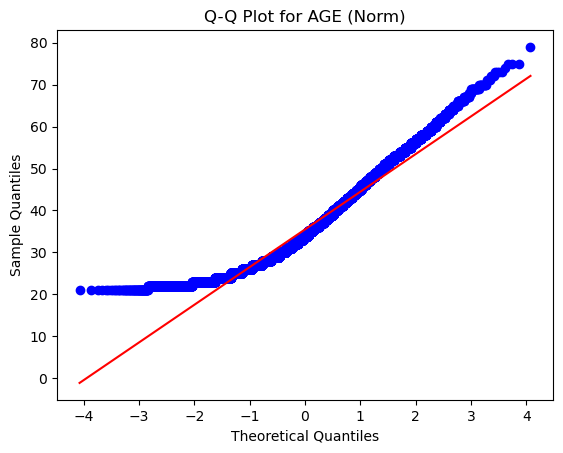

In [10]:
# Select the 'AGE' column from the DataFrame

data = df['AGE']

# Create a Q-Q plot
fig, ax = plt.subplots()
stats.probplot(data, dist='norm', plot=ax)

# Set the title and labels
ax.set_title('Q-Q Plot for AGE (Norm)')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

# Show the plot
plt.show()

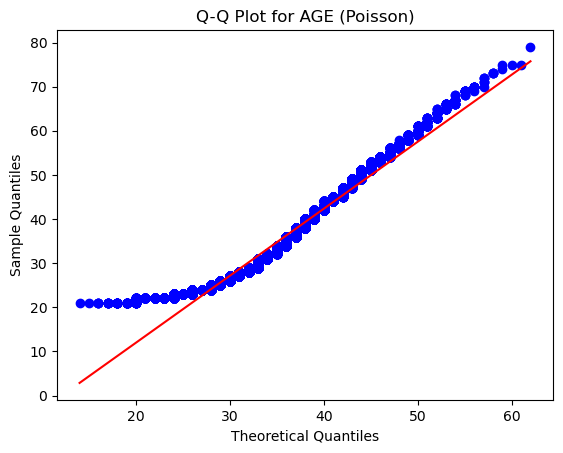

In [11]:
# Create a Q-Q plot for the 'AGE' column

fig, ax = plt.subplots()
stats.probplot(df['AGE'], dist='poisson', sparams=(df['AGE'].mean()), plot=ax)

# Set the title and labels
ax.set_title('Q-Q Plot for AGE (Poisson)')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

# Show the plot
plt.show()

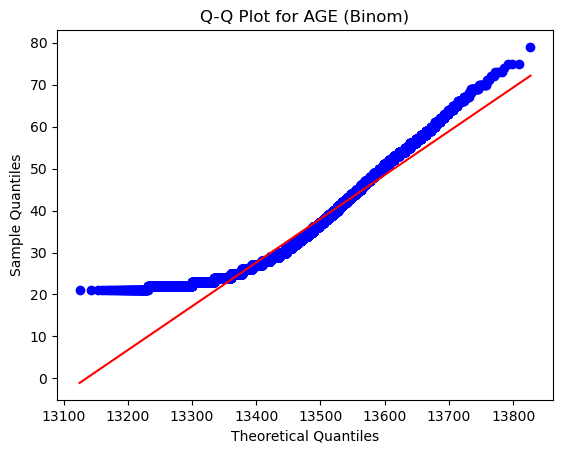

In [12]:
fig, ax = plt.subplots()
n = len(df['AGE'])
p = df['AGE'].mean() / df['AGE'].max()  # Adjust the value of p according to your dataset
stats.probplot(df['AGE'], dist='binom', sparams=(n, p), plot=ax)

# Set the title and labels
ax.set_title('Q-Q Plot for AGE (Binom)')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

# Show the plot
plt.show()

#### It can be observed that a poisson distribution fits the Age data of our customers.

In [13]:
df.columns

Index(['ID', 'AMT', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'AGE',
       'REPAY_SEP', 'REPAY_AUG', 'REPAY_JUL', 'REPAY_JUN', 'REPAY_MAY',
       'REPAY_APR', 'AMTBILL_SEP', 'AMTBILL_AUG', 'AMTBILL_JUL', 'AMTBILL_JUN',
       'AMTBILL_MAY', 'AMTBILL_APR', 'AMT_BILL', 'PRE_SEP', 'PRE_AUG',
       'PRE_JUL', 'PRE_JUN', 'PRE_MAY', 'PRE_APR', 'PREV_PMT', 'DEF_AMT'],
      dtype='object')

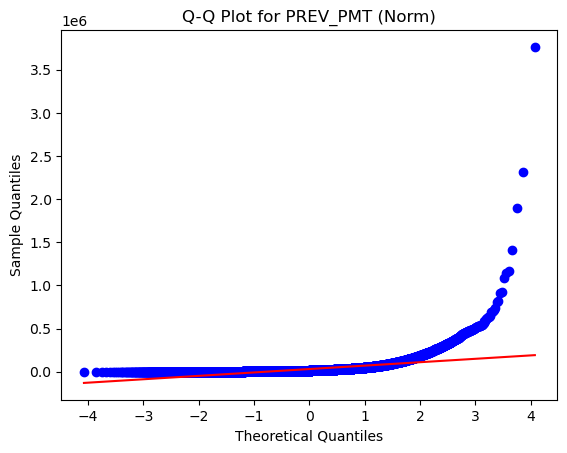

In [14]:
# Select the 'PREV_PMT' column from the DataFrame
data = df['PREV_PMT']

# Create a Q-Q plot
fig, ax = plt.subplots()
stats.probplot(data, dist='norm', plot=ax)

# Set the title and labels
ax.set_title('Q-Q Plot for PREV_PMT (Norm)')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

# Show the plot
plt.show()

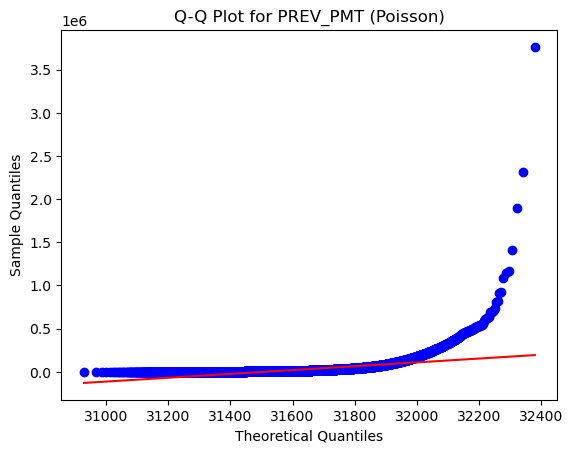

In [15]:
# Create a Q-Q plot for the 'PREV_PMT' column

fig, ax = plt.subplots()
stats.probplot(df['PREV_PMT'], dist='poisson', sparams=(df['PREV_PMT'].mean()), plot=ax)

# Set the title and labels
ax.set_title('Q-Q Plot for PREV_PMT (Poisson)')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

# Show the plot
plt.show()

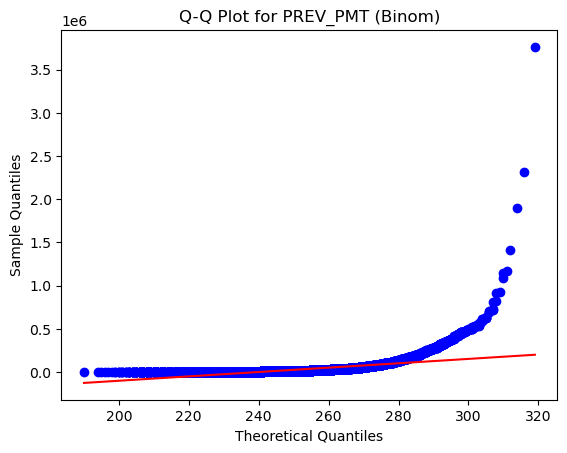

In [16]:
fig, ax = plt.subplots()
n = len(df['PREV_PMT'])
p = df['PREV_PMT'].mean() / df['PREV_PMT'].max()  # Adjust the value of p according to your dataset
stats.probplot(df['PREV_PMT'], dist='binom', sparams=(n, p), plot=ax)

# Set the title and labels
ax.set_title('Q-Q Plot for PREV_PMT (Binom)')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

# Show the plot
plt.show()

In [17]:
df.columns

Index(['ID', 'AMT', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'AGE',
       'REPAY_SEP', 'REPAY_AUG', 'REPAY_JUL', 'REPAY_JUN', 'REPAY_MAY',
       'REPAY_APR', 'AMTBILL_SEP', 'AMTBILL_AUG', 'AMTBILL_JUL', 'AMTBILL_JUN',
       'AMTBILL_MAY', 'AMTBILL_APR', 'AMT_BILL', 'PRE_SEP', 'PRE_AUG',
       'PRE_JUL', 'PRE_JUN', 'PRE_MAY', 'PRE_APR', 'PREV_PMT', 'DEF_AMT'],
      dtype='object')

### Confidence Interval for the Mean

#### Amount of bill statement

In [18]:
data = df[['AMTBILL_SEP', 'AMTBILL_AUG', 'AMTBILL_JUL', 'AMTBILL_JUN', 'AMTBILL_MAY', 'AMTBILL_APR']]  
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

C:\Users\catie\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [19]:
#Defining the confidence level
confidence_level = 0.95 

In [20]:
#Determining the critical value based on the sample size
n = len(data)

#Using z-distribution as sample size is > 30
critical_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

In [21]:
#Calculating the margin of error
margin_of_error = critical_value * (sample_std / np.sqrt(n))

In [22]:
#Constructing the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

confidence_interval

(AMTBILL_SEP    50412.563771
 AMTBILL_AUG    48389.088346
 AMTBILL_JUL    46251.192487
 AMTBILL_JUN    42559.350386
 AMTBILL_MAY    39639.711715
 AMTBILL_APR    38234.110119
 dtype: float64,
 AMTBILL_SEP    52078.489762
 AMTBILL_AUG    49999.611588
 AMTBILL_JUL    47820.205246
 AMTBILL_JUN    44014.783081
 AMTBILL_MAY    41015.387019
 AMTBILL_APR    39580.950481
 dtype: float64)

#### Amount of previous payment

In [23]:
data = df[['PRE_SEP', 'PRE_AUG', 'PRE_JUL', 'PRE_JUN', 'PRE_MAY', 'PRE_APR']]
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

C:\Users\catie\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [24]:
#Defining the confidence level
confidence_level = 0.95 

In [25]:
#Determining the critical value based on the sample size
n = len(data)

#Using z-distribution as sample size is > 30
critical_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

In [26]:
#Calculating the margin of error
margin_of_error = critical_value * (sample_std / np.sqrt(n))

In [27]:
#Constructing the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

confidence_interval

(PRE_SEP    5476.152782
 PRE_AUG    5660.436298
 PRE_JUL    5026.443636
 PRE_JUN    4648.800838
 PRE_MAY    4626.500506
 PRE_APR    5014.335300
 dtype: float64,
 PRE_SEP    5851.008218
 PRE_AUG    6181.890702
 PRE_JUL    5424.919364
 PRE_JUN    5003.352895
 PRE_MAY    4972.274761
 PRE_APR    5416.669833
 dtype: float64)

#### Amount of given credit in dollars

In [28]:
data = df['AMT']
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

In [29]:
#Defining the confidence level
confidence_level = 0.95 

In [30]:
#Determining the critical value based on the sample size
n = len(data)

#Using z-distribution as sample size is > 30
critical_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

In [31]:
#Calculating the margin of error
margin_of_error = critical_value * (sample_std / np.sqrt(n))

In [32]:
#Constructing the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Results
print("Sample Mean: {:.2f}".format(round(sample_mean.item(), 2)))
print("Confidence Level: {}".format(confidence_level))
print("Critical Value: {:.2f}".format(critical_value.item()))
print("Margin of Error: {:.2f}".format(margin_of_error.item()))
print("Confidence Interval: ({:.2f}, {:.2f})".format(confidence_interval[0], confidence_interval[1]))

Sample Mean: 167484.32
Confidence Level: 0.95
Critical Value: 1.96
Margin of Error: 1468.21
Confidence Interval: (166016.12, 168952.53)


### Confidence Interval for the Proportion

In [33]:
#Setting the number of successes and sample size
successes = df['DEF_AMT'].value_counts()[0]  # Count of '0' values in 'DEF_AMT'
sample_size = len(df)

#Calculating the sample proportion
p = successes / sample_size

In [34]:
#Determining the desired confidence level
confidence_level = 0.95

#Finding the critical value based on the confidence level
critical_value = stats.norm.ppf((1 + confidence_level) / 2)

In [35]:
#Calculating the standard error of the proportion
standard_error = np.sqrt((p * (1 - p)) / sample_size)

#Calculating the margin of error
margin_of_error = critical_value * standard_error

#Constructing the confidence interval
confidence_interval = (p - margin_of_error, p + margin_of_error)

#Results
print(f"Confidence Interval: {confidence_interval}")

Confidence Interval: (0.7741032980995245, 0.7834967019004756)


#### Insights: We can be 95% confident that the true proportion of customers who have a default payment status of '0' (no default) in the population is between 0.774 and 0.784

## Task: Conduct hypothesis tests using the t-test, F-test, ANOVA-test, and Chi-Square test to identify factors that contribute to credit card defaults. You can use libraries such as scipy.stats and statsmodels to conduct these tests.

### T-test

In [36]:
df.columns

Index(['ID', 'AMT', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'AGE',
       'REPAY_SEP', 'REPAY_AUG', 'REPAY_JUL', 'REPAY_JUN', 'REPAY_MAY',
       'REPAY_APR', 'AMTBILL_SEP', 'AMTBILL_AUG', 'AMTBILL_JUL', 'AMTBILL_JUN',
       'AMTBILL_MAY', 'AMTBILL_APR', 'AMT_BILL', 'PRE_SEP', 'PRE_AUG',
       'PRE_JUL', 'PRE_JUN', 'PRE_MAY', 'PRE_APR', 'PREV_PMT', 'DEF_AMT'],
      dtype='object')

In [37]:
#Selecting the variable columns of interest
var_columns = ['AMT', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'AGE']

In [38]:
#Splitting the dataset into defaulters and non-defaulters
defaulters = df[df['DEF_AMT'] == 1]
non_defaulters = df[df['DEF_AMT'] == 0]

In [39]:
#Performing t-tests for each variable column
for column in var_columns:
    t_statistic, p_value = ttest_ind(defaulters[column], non_defaulters[column])
    print(f"Variable: {column}")
    print(f"T-Statistic: {t_statistic:.2f}")
    print(f"P-Value: {p_value:.4f}")
    print("")

    if p_value < 0.05:
        print("There is a significant difference in means between defaulters and non-defaulters.")
    else:
        print("There is no significant difference in means between defaulters and non-defaulters.")

    print("-------------------------------------------")

Variable: AMT
T-Statistic: -26.91
P-Value: 0.0000

There is a significant difference in means between defaulters and non-defaulters.
-------------------------------------------
Variable: GENDER
T-Statistic: -6.93
P-Value: 0.0000

There is a significant difference in means between defaulters and non-defaulters.
-------------------------------------------
Variable: EDUCATION
T-Statistic: 4.86
P-Value: 0.0000

There is a significant difference in means between defaulters and non-defaulters.
-------------------------------------------
Variable: MARITAL_STATUS
T-Statistic: -4.63
P-Value: 0.0000

There is a significant difference in means between defaulters and non-defaulters.
-------------------------------------------
Variable: AGE
T-Statistic: 2.41
P-Value: 0.0161

There is a significant difference in means between defaulters and non-defaulters.
-------------------------------------------


### Insights:

#### - Regardless the means being significant for all the variables, Age will be dropped as p-value is 
#### - Variable "AMT" had the highest T-stat score, hence it seems that amount of loan offered can influence significantly whether the customer will default or not

### F-test (ANOVA)

#### Defaulting males vs Non-defaulting males

In [40]:
#Splitting the data based on the groups defined by each variable within defaulters
group1 = defaulters[defaulters['GENDER'] == 1]['AMT']
group2 = non_defaulters[non_defaulters['GENDER'] == 1]['AMT']

In [41]:
#Performing the ANOVA test
f_statistic, p_value = f_oneway(group1, group2)

#Interpret the results
if p_value < 0.05:
    print("There are significant differences in means among the groups")
else:
    print("There is not enough evidence to suggest significant differences in means among the groups.")
    
#ANOVA test results
print("ANOVA Test Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

There are significant differences in means among the groups
ANOVA Test Results:
F-Statistic: 296.0666431167774
P-Value: 1.471338972818424e-65


#### Defaulting females vs Non-defaulting females

In [42]:
#Splitting the data based on the groups defined by each variable within defaulters
group1 = defaulters[defaulters['GENDER'] == 2]['AMT']
group2 = non_defaulters[non_defaulters['GENDER'] == 2]['AMT']

In [43]:
#Performing the ANOVA test
f_statistic, p_value = f_oneway(group1, group2)

#Interpret the results
if p_value < 0.05:
    print("There are significant differences in means among the groups.")
else:
    print("There is not enough evidence to suggest significant differences in means among the groups.")
    
#ANOVA test results
print("ANOVA Test Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

There are significant differences in means among the groups.
ANOVA Test Results:
F-Statistic: 418.68482736481513
P-Value: 5.172387751558438e-92


In [44]:
defaulters['GENDER'].value_counts()

2    3763
1    2873
Name: GENDER, dtype: int64

In [45]:
print("Defaulting feales: ",defaulters[defaulters['GENDER'] == 2]['AMT'].mean())
print("Defaulting males: ",defaulters[defaulters['GENDER'] == 1]['AMT'].mean())

Defaulting feales:  133327.13260696252
Defaulting males:  125895.46815175774


### Insights:

#### While it can be seen that the mean of the amount between the defaulters and non-defaulters is obviously significant, we can see that majority of the females have come under the defaulting category. 

#### ANOVA test showed that there is a massive difference between the amount of difference of credit offered to females who defaulted vs who didn't default AND males who defaulted who didn't default

#####
### From this analysis we can conclude that the company needs to lower down the credit line offered towards females

#### Defaulting School Graduates vs Non-defaulting School Graduates

In [46]:
#Splitting the data based on the groups defined by each variable within defaulters
group1 = defaulters[defaulters['EDUCATION'] == 1]['AMT']
group2 = non_defaulters[non_defaulters['EDUCATION'] == 1]['AMT']

In [47]:
#Performing the ANOVA test
f_statistic, p_value = f_oneway(group1, group2)

#Interpret the results
if p_value < 0.05:
    print("There are significant differences in means among the groups")
else:
    print("There is not enough evidence to suggest significant differences in means among the groups.")
    
#ANOVA test results
print("ANOVA Test Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

There are significant differences in means among the groups
ANOVA Test Results:
F-Statistic: 168.18395791707007
P-Value: 3.600705053141425e-38


#### Defaulting University Graduates vs Non-defaulting University Graduates

In [48]:
#Splitting the data based on the groups defined by each variable within defaulters
group1 = defaulters[defaulters['EDUCATION'] == 2]['AMT']
group2 = non_defaulters[non_defaulters['EDUCATION'] == 2]['AMT']

In [49]:
#Performing the ANOVA test
f_statistic, p_value = f_oneway(group1, group2)

#Interpret the results
if p_value < 0.05:
    print("There are significant differences in means among the groups.")
else:
    print("There is not enough evidence to suggest significant differences in means among the groups.")
    
#ANOVA test results
print("ANOVA Test Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

There are significant differences in means among the groups.
ANOVA Test Results:
F-Statistic: 367.0162489125193
P-Value: 8.936504763064408e-81


#### Defaulting High-school Graduates vs Non-defaulting High-school Graduates

In [50]:
#Splitting the data based on the groups defined by each variable within defaulters
group1 = defaulters[defaulters['EDUCATION'] == 3]['AMT']
group2 = non_defaulters[non_defaulters['EDUCATION'] == 3]['AMT']

In [51]:
#Performing the ANOVA test
f_statistic, p_value = f_oneway(group1, group2)

#Interpret the results
if p_value < 0.05:
    print("There are significant differences in means among the groups.")
else:
    print("There is not enough evidence to suggest significant differences in means among the groups.")
    
#ANOVA test results
print("ANOVA Test Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

There are significant differences in means among the groups.
ANOVA Test Results:
F-Statistic: 105.72195856295967
P-Value: 1.5018719236844852e-24


In [52]:
defaulters['EDUCATION'].value_counts()

2    3330
1    2036
3    1237
5      26
4       7
Name: EDUCATION, dtype: int64

### Insights:

#### While it is obvious that the p-value will be high between defaulters and non-defaulters, it seems that company has offered a high line of credit towards school graduates even though they occupy the second largest population in the defaulter category when looked at educational level
######
### From this analysis we can conclude that the company needs to lower down the credit line offered school graduates immediately and look to revisit their policy towards University Graduates.

### Chi-Squared Test

In [53]:
#Creating contingency tables
gender_defamt_table = pd.crosstab(df['GENDER'], df['DEF_AMT'])
education_defamt_table = pd.crosstab(df['EDUCATION'], df['DEF_AMT'])
marital_defamt_table = pd.crosstab(df['MARITAL_STATUS'], df['DEF_AMT'])
age_defamt_table = pd.crosstab(df['AGE'], df['DEF_AMT'])

In [54]:
#Performing Chi-Square tests
gender_chi2, gender_p_value, _, _ = stats.chi2_contingency(gender_defamt_table)
education_chi2, education_p_value, _, _ = stats.chi2_contingency(education_defamt_table)
marital_chi2, marital_p_value, _, _ = stats.chi2_contingency(marital_defamt_table)
age_chi2, age_p_value, _, _ = stats.chi2_contingency(age_defamt_table)

In [56]:
#Results
print("Chi-Square Test Results:")
print("Variable: GENDER")
print("Chi-Square Statistic:", gender_chi2)
print("P-Value:", gender_p_value)
print()
print("Variable: EDUCATION")
print("Chi-Square Statistic:", education_chi2)
print("P-Value:", education_p_value)
print()
print("Variable: MARITAL_STATUS")
print("Chi-Square Statistic:", marital_chi2)
print("P-Value:", marital_p_value)
print()
print("Variable: AGE")
print("Chi-Square Statistic:", age_chi2)
print("P-Value:", age_p_value)


Chi-Square Test Results:
Variable: GENDER
Chi-Square Statistic: 47.70879689062111
P-Value: 4.944678999412044e-12

Variable: EDUCATION
Chi-Square Statistic: 156.49664507553865
P-Value: 8.244709952928782e-33

Variable: MARITAL_STATUS
Chi-Square Statistic: 29.493573626551015
P-Value: 3.9405048029650717e-07

Variable: AGE
Chi-Square Statistic: 158.55290013282718
P-Value: 5.6429915495725416e-12


### Insights:


### From this analysis we can conclude that the Education and Age are the most influential variables when it comes to credit card defaults

### Furthermore...

In [67]:
# Create age bins with a width of 10
df['Age_Bin'] = pd.cut(df['AGE'], bins=range(0, 100, 10), right=False)

# Create a cross-tabulation table between 'EDUCATION', 'Age_Bin', and 'DEF_AMT'
education_agebin_defamt_table = pd.crosstab([df['EDUCATION'], df['Age_Bin']], df['DEF_AMT'], margins=True)

# Calculate the default rate as the sum of defaults within each education level and age bin
education_agebin_defamt_table['Default_Rate'] = education_agebin_defamt_table[1] / education_agebin_defamt_table['All']

# Sort the table by default rate in descending order
sorted_table = education_agebin_defamt_table.sort_values('Default_Rate', ascending=False)

# Get the top 5 education levels and age bins with the highest default rates
top_5_default_rates = sorted_table.head(5)

# Print the result
print("Top 5 Education Levels and Age Bins with the Highest Default Rates:")
print(top_5_default_rates)

Top 5 Education Levels and Age Bins with the Highest Default Rates:
DEF_AMT               0    1  All  Default_Rate
EDUCATION Age_Bin                              
2         [60, 70)   63   35   98      0.357143
3         [70, 80)    8    4   12      0.333333
          [20, 30)  688  261  949      0.275026
1         [60, 70)   61   23   84      0.273810
3         [50, 60)  656  234  890      0.262921


### From this output we can easily conclude that the customers that the company needs to be highly critical of are university gradutes who are the age of seniority (between 60 to 70).